In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import joblib
from pyngrok import ngrok

In [2]:
file_path = 'Laptop_price.csv'
df = pd.read_csv(file_path)
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([    
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
   ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5))
])
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'laptop_price_model.pkl')

['laptop_price_model.pkl']

In [5]:
!git init
!git add .
!git commit -m "Добавлен ML-пайплайн“
!git remote add origin https://github.com/Filonist/Ml.git
!git branch -M main
!git push -u origin main

Reinitialized existing Git repository in E:/Шарага/МТУСИ/2 курс/2 часть/ИТ/.git/


[master (root-commit) a99fa27] Добавлен ML-пайплайн“
 4 files changed, 1002 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 Laptop_price.csv
 create mode 100644 laptop_price_model.pkl
 create mode 100644 "\320\245\320\260\321\203\321\201\321\202\320\276\320\262 \320\241.\320\241.\320\243\320\221\320\222\320\2422302.ipynb"
branch 'main' set up to track 'origin/main'.


To https://github.com/Filonist/Ml.git
 * [new branch]      main -> main


In [4]:
%%writefile app.py
from fastapi import FastAPI, File, UploadFile
import pandas as pd
import joblib
from io import BytesIO

app = FastAPI()

# Загрузка обученной модели
model_path = "laptop_price_model.pkl"
model = joblib.load(model_path)

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    content = await file.read()
    df = pd.read_csv(BytesIO(content))
    predictions = model.predict(df)
    return {"predictions": predictions.tolist()}


Overwriting app.py


In [ ]:
!nohup uvicorn app:app --host 0.0.0.0 --port 8000 --reload > fastapi.log 2>&1

����� �� ����� ������� ����� � 䠩��, ⠪ ��� ��� 䠩� ����� ��㣨� ����ᮬ.


In [12]:
!ngrok config add-authtoken 2v7SkXj39v3BlXYE8641GBtjvRB_DkQAqK39DP2JGpbqkuuT # Работает только с ВПН
public_url = ngrok.connect(8000)
print("API доступно по адресу:", public_url)

ERROR:  accepts 1 arg(s), received 6


API доступно по адресу: NgrokTunnel: "https://96ad-13-201-255-219.ngrok-free.app" -> "http://localhost:8000"


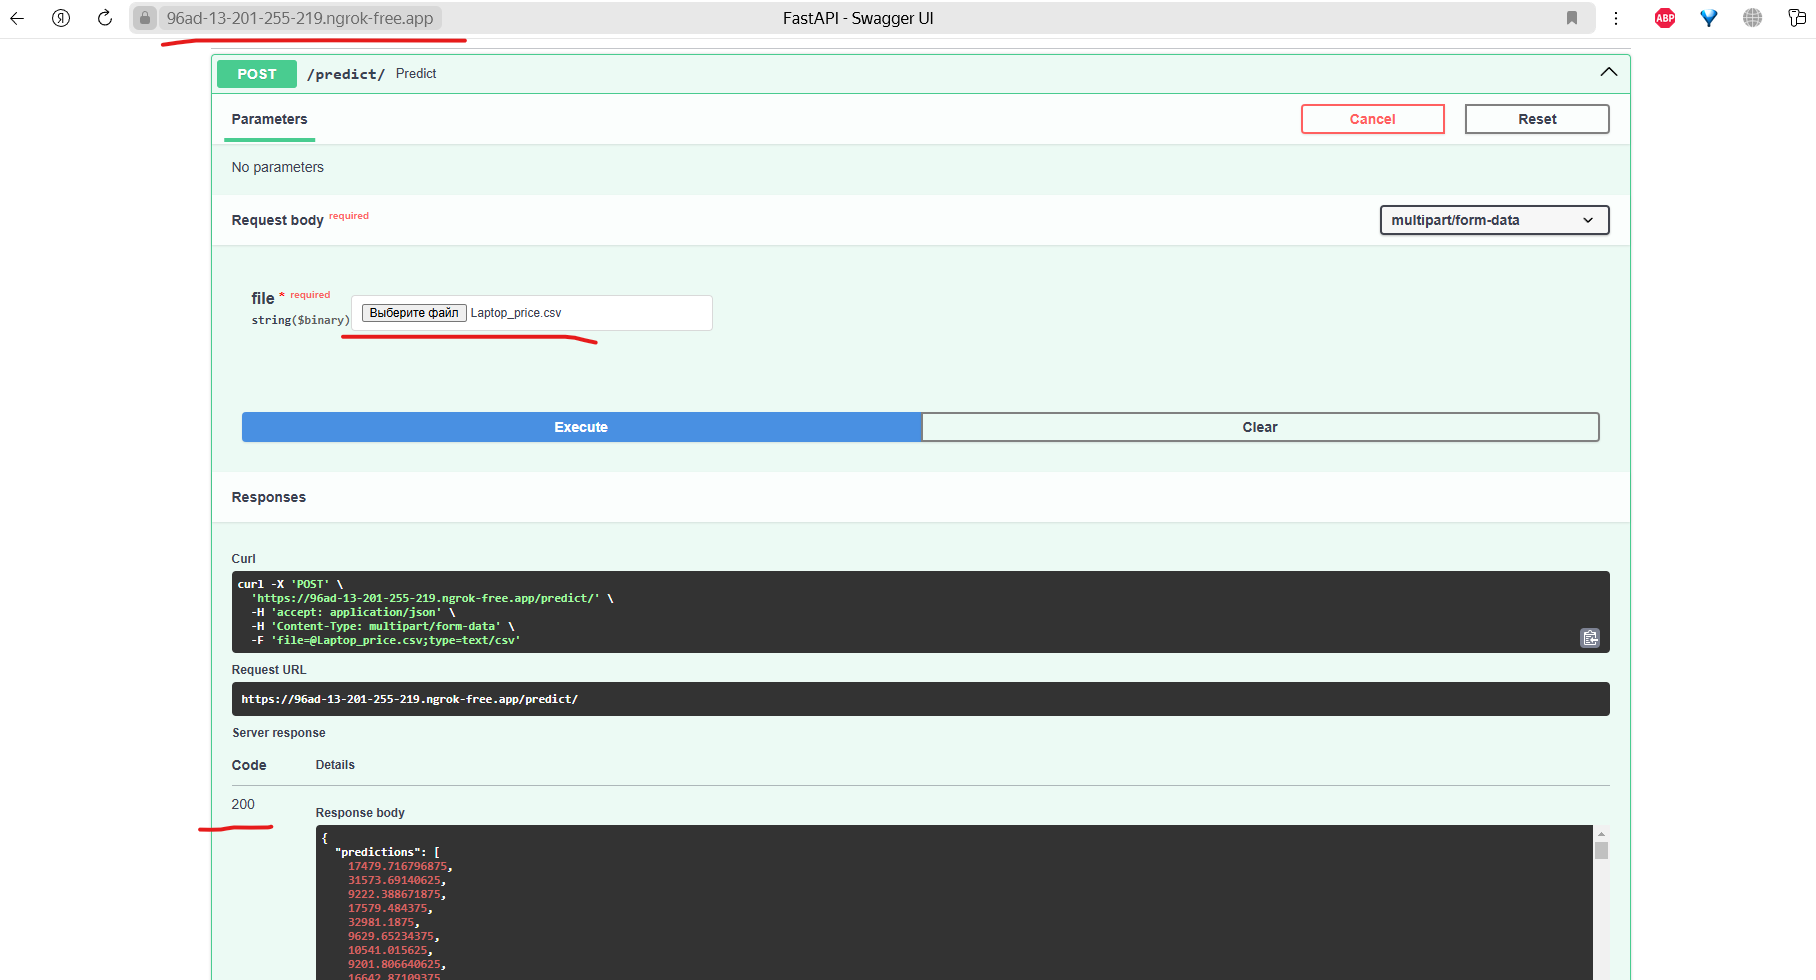